<h1>Análise usando o Algoritmo K-Means</h1>

In [2]:
#Imports das libs necessárias para as análises

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.sampledata
#bokeh.sampledata.download()
from IPython.core.display import display, HTML

In [5]:
#Load dos datasets

df_matriculas = pd.read_csv('datasets/Matriculas-em-componentes/matricula-componente-20172.csv', sep=';')
df_componentes = pd.read_csv('datasets/componentes-curriculares-presenciais.csv', sep=';', usecols=['id_componente', 'tipo_componente', 'codigo', 'nivel', 'nome','ch_total'] , low_memory=False)
df_cursos = pd.read_csv('datasets/Cursos/cursos-de-graduacao.csv', sep=';', usecols=['id_curso', 'nome_curso', 'area_conhecimento', 'nivel_ensino', 'turno', 'municipio', 'campus'])
df_estruturas = pd.read_csv('datasets/estruturas-curriculares.csv', usecols=['id_curriculo', 'codigo', 'nome_matriz', 'id_curso', 'nome_curso'], sep=';')
df_turmas = pd.read_csv('datasets/Turmas/turmas-2017.2.csv', usecols=['id_turma', 'codigo_turma', 'id_componente', 'nivel_ensino', 'periodo', 'capacidade_aluno', 'tipo', 'distancia', 'qtd_aulas_lancadas', 'situacao_turma', 'convenio','modalidade_participantes'], sep=';')


In [6]:
#Filtros e merges - Preparando dataframes

df_matriculas = df_matriculas.drop_duplicates()
#Seleção dos cursos de graduação, alvo do projeto de mestrado
df_turmas = df_turmas.loc[df_turmas['nivel_ensino'] == 'GRADUAÇÃO']

df_componentes_turmas = pd.merge(df_componentes, df_turmas)
df_componentes_turmas = df_componentes_turmas.drop_duplicates()

df_cursos_componentes_turmas = pd.merge(df_cursos, df_componentes_turmas)
df_cursos_componentes_turmas = df_cursos_componentes_turmas.drop_duplicates()

df_matriculas_cursos_componentes_turmas = pd.merge(df_matriculas, df_cursos_componentes_turmas)
df_matriculas_cursos_componentes_turmas = df_matriculas_cursos_componentes_turmas.drop_duplicates()

df_matriculas_cursos_componentes_turmas.drop(['nivel_ensino', 'turno', 'municipio', 'campus', 'codigo', 'nivel', 'periodo', 'capacidade_aluno', 'tipo', 'distancia', 'situacao_turma'], axis=1, inplace=True)


In [7]:
#Retirando os campos nulos da coluna nota

df_matriculas_cursos_componentes_turmas = df_matriculas_cursos_componentes_turmas.loc[(df_matriculas_cursos_componentes_turmas['nota'] >= 0) & (df_matriculas_cursos_componentes_turmas['nota'] <= 10)]

In [30]:
#df_matriculas_cursos_componentes_turmas.query('nome_curso == "FÍSICA"')

#df_matriculas_cursos_componentes_turmas_CeT_N1 = df_matriculas_cursos_componentes_turmas.query('nome_curso == "CIÊNCIAS E TECNOLOGIA" & nome == "CÁLCULO I" & unidade == "1.0"')
#df_matriculas_cursos_componentes_turmas_CeT_N1.rename(columns={'nota': 'nota1'}, inplace=True)
#df_matriculas_cursos_componentes_turmas_CeT_N1.drop(['id_turma', 'id_curso', 'unidade', 'reposicao', 'faltas_unidade', 'nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente', 'nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio', 'modalidade_participantes'], axis=1, inplace=True)

#df_matriculas_cursos_componentes_turmas_CeT_N2 = df_matriculas_cursos_componentes_turmas.query('nome_curso == "CIÊNCIAS E TECNOLOGIA" & nome == "CÁLCULO I" & unidade == "2.0"')
#df_matriculas_cursos_componentes_turmas_CeT_N2.rename(columns={'nota': 'nota2'}, inplace=True)
#df_matriculas_cursos_componentes_turmas_CeT_N2.drop(['id_turma', 'id_curso', 'unidade', 'reposicao', 'faltas_unidade', 'nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente', 'nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio', 'modalidade_participantes'], axis=1, inplace=True)

#df_matriculas_cursos_componentes_turmas_CeT_N3 = df_matriculas_cursos_componentes_turmas.query('nome_curso == "CIÊNCIAS E TECNOLOGIA" & nome == "CÁLCULO I" & unidade == "3.0"')
#df_matriculas_cursos_componentes_turmas_CeT_N3.rename(columns={'nota': 'nota3'}, inplace=True)
#df_matriculas_cursos_componentes_turmas_CeT_N3.drop(['id_turma', 'id_curso', 'unidade', 'reposicao', 'faltas_unidade', 'nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente', 'nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio', 'modalidade_participantes'], axis=1, inplace=True)

#df_matriculas_cursos_componentes_turmas_CeT_juntos = pd.merge(df_matriculas_cursos_componentes_turmas_CeT_N1, df_matriculas_cursos_componentes_turmas_CeT_N2)
#df_matriculas_cursos_componentes_turmas_CeT_juntos = pd.merge(df_matriculas_cursos_componentes_turmas_CeT_juntos, df_matriculas_cursos_componentes_turmas_CeT_N3)

df_matriculas_cursos_componentes_turmas_CeT_juntos.to_csv('datasets/CeT.csv')

#df_matriculas_cursos_componentes_turmas_CeT_juntos

In [31]:
#Selecionando curso para análise

#df_matriculas_cursos_componentes_turmas_BTI = df_matriculas_cursos_componentes_turmas.loc[(df_matriculas_cursos_componentes_turmas['nome_curso'] == "TECNOLOGIA DA INFORMAÇÃO")]
#df_matriculas_cursos_componentes_turmas_FIS = df_matriculas_cursos_componentes_turmas.loc[(df_matriculas_cursos_componentes_turmas['nome_curso'] == "FÍSICA")]

In [32]:
display(df_matriculas_cursos_componentes_turmas_FIS)
#df_matriculas_cursos_componentes_turmas_BTI.columns

id_turma                       id_discente     id_curso  unidade  \
12672   57605476  9601f8e937b54f8be9db395321350ae7    2000041.0      3.0   
12673   57605476  9601f8e937b54f8be9db395321350ae7    2000041.0      2.0   
12674   57605476  9601f8e937b54f8be9db395321350ae7    2000041.0      1.0   
12675   57605476  ccb05e004c2a630872fe05b71e029de9    2000041.0      3.0   
12676   57605476  ccb05e004c2a630872fe05b71e029de9    2000041.0      2.0   
12677   57605476  ccb05e004c2a630872fe05b71e029de9    2000041.0      1.0   
12678   57605476  dfc3f8092e4cbb2f25bfa980b5f00f4f    2000041.0      3.0   
12679   57605476  dfc3f8092e4cbb2f25bfa980b5f00f4f    2000041.0      2.0   
12680   57605476  dfc3f8092e4cbb2f25bfa980b5f00f4f    2000041.0      1.0   
13016   57605300  5c76783c4477c0ff202abf9b00c275c7  111635050.0      1.0   
13017   57605300  5c76783c4477c0ff202abf9b00c275c7  111635050.0      3.0   
13018   57605300  5c76783c4477c0ff202abf9b00c275c7  111635050.0      2.0   
19800   57608453  a53f2eba3e2510d3da4025568b36b968  111635050.0      3.0   
19801   57608453  a53f2eba3e2510d3da4025568b36b968  111635050.0      2.0   
19802   57608453  a53f2eba3e2510d3da4025568b36b968  111635050.0      1.0   
19803   57608453  941e7d6bb04e1078112190273bb2929e  111635050.0      1.0   
19804   57608453  941e7d6bb04e1078112190273bb2929e  111635050.0      3.0   
19805   57608453  941e7d6bb04e1078112190273bb2929e  111635050.0      2.0   
19806   57608453  1ff37dd4376be9b7f9248e697ebab392  111635050.0      3.0   
19807   57608453  1ff37dd4376be9b7f9248e697ebab392  111635050.0      2.0   
19808   57608453  1ff37dd4376be9b7f9248e697ebab392  111635050.0      1.0   
19809   57608453  0682a6240ea9f25d9305e92f8baf39ad  111635050.0      3.0   
19810   57608453  0682a6240ea9f25d9305e92f8baf39ad  111635050.0      2.0   
19811   57608453  0682a6240ea9f25d9305e92f8baf39ad  111635050.0      1.0   
19812   57608453  5445f97239561d927d5fce63ee1855a3  111635050.0      3.0   
19813   57608453  5445f97239561d927d5fce63ee1855a3  111635050.0      2.0   
19814   57608453  5445f97239561d927d5fce63ee1855a3  111635050.0      1.0   
19815   57608453  fb52bb1dac41c2aeabb698213d6af2af  111635050.0      3.0   
19816   57608453  fb52bb1dac41c2aeabb698213d6af2af  111635050.0      2.0   
19817   57608453  fb52bb1dac41c2aeabb698213d6af2af  111635050.0      1.0   
...          ...                               ...          ...      ...   
367266  57605047  f08688303e50f271795fdf12175e1a05  111635050.0      3.0   
367267  57605047  f08688303e50f271795fdf12175e1a05  111635050.0      2.0   
367268  57605047  f08688303e50f271795fdf12175e1a05  111635050.0      1.0   
367375  57608468  aac72c912e7b74d9ce1eb800ff6340ee    2000041.0      1.0   
367376  57608468  aac72c912e7b74d9ce1eb800ff6340ee    2000041.0      2.0   
367377  57608468  aac72c912e7b74d9ce1eb800ff6340ee    2000041.0      3.0   
367425  57605035  85ae0563c8c50505383cd46a1b6edad8  111635050.0      2.0   
367426  57605035  85ae0563c8c50505383cd46a1b6edad8  111635050.0      1.0   
367427  57605035  85ae0563c8c50505383cd46a1b6edad8  111635050.0      3.0   
367454  57605036  6294a7a382bb835d6cae563a396f1c37  111635050.0      3.0   
367455  57605036  6294a7a382bb835d6cae563a396f1c37  111635050.0      2.0   
367456  57605036  6294a7a382bb835d6cae563a396f1c37  111635050.0      1.0   
367511  57605176  85ae0563c8c50505383cd46a1b6edad8  111635050.0      3.0   
367512  57605176  85ae0563c8c50505383cd46a1b6edad8  111635050.0      2.0   
367513  57605176  85ae0563c8c50505383cd46a1b6edad8  111635050.0      1.0   
367575  57605173  ff401d5dfc38a11e464aec4cba6271e6    2000041.0      1.0   
367576  57605173  ff401d5dfc38a11e464aec4cba6271e6    2000041.0      3.0   
367577  57605173  ff401d5dfc38a11e464aec4cba6271e6    2000041.0      2.0   
367858  57606461  555ff234926f1f4c58e68747008c82cc    2000041.0      3.0   
367859  57606461  555ff234926f1f4c58e68747008c82cc    2000041.0      2.0   
367860  57606461  555ff234926f1f4c58e68747008c82cc    20

In [74]:
#df_matriculas_cursos_componentes_turmas_BTI.query('id_discente == "62300dff419dc6c4c72fb8b34dc68b24" & unidade == "1.0"')
#df_matriculas_cursos_componentes_turmas_BTI.sum()

#df_matriculas_cursos_componentes_turmas_FIS.to_csv('datasets/fisica.csv')

df_matriculas_cursos_componentes_turmas_FIS.query('id_turma == 57609161 & unidade == 1.0')
#df_matriculas_cursos_componentes_turmas_FIS.sum()

id_turma                       id_discente   id_curso  unidade  nota  \
139562  57609161  844f36563c6e5eb6d996653f80ed9938  2000041.0      1.0   5.4   
139565  57609161  2fca3031be1b118eda459c77c5d900f5  2000041.0      1.0   0.0   
139568  57609161  19e89eaae4278d7720c9f7136d803d1c  2000041.0      1.0   4.2   
139571  57609161  0355f559f289bd24735802848051d75c  2000041.0      1.0   9.8   
139574  57609161  41b7e3e5c56c6522d7a1296a8249f1bd  2000041.0      1.0   9.7   
139577  57609161  cbf765e54b6e36f834e895f66ae79799  2000041.0      1.0   4.9   
139580  57609161  9ca7a227eec747ffe5a01ecd33d2a003  2000041.0      1.0   7.0   
139583  57609161  8a42912e735428b99c0368296813f864  2000041.0      1.0   8.0   
139586  57609161  66b42877a5edaefc59f86ebde65c87c4  2000041.0      1.0   4.0   
139589  57609161  60c0b348904ce5ba47b87f51c7068909  2000041.0      1.0   0.0   
139592  57609161  6dc4ada8623260b94b49288cc960ba3d  2000041.0      1.0   2.8   
139595  57609161  8f2687674747cc4cd6de7a13a5a7d490  2000041.0      1.0   0.0   
139601  57609161  7978c46f2096cec715db09ae3ce8c708  2000041.0      1.0   7.8   
139604  57609161  bafee59b0a435b2c1a85db1ff83ade12  2000041.0      1.0   5.0   
139607  57609161  0c30ac26abe4b37dcd2bdd84f91cc276  2000041.0      1.0   4.5   
139610  57609161  a6a1aa5bbc053d51cd856162605e1677  2000041.0      1.0   3.0   
139613  57609161  b48a3cea4c814e0da8327bb5edcd9a4b  2000041.0      1.0   3.5   
139616  57609161  3f5aa66b3494b785e57ae83f593fd1b8  2000041.0      1.0   4.0   
139619  57609161  bd63b31d8ad68da42074a0326165efef  2000041.0      1.0   9.0   
139622  57609161  895a74a241de831e92bc9dd3c9dbbd2b  2000041.0      1.0   0.0   
139625  57609161  1ddb32e8a2e5c59e5a67fa5169e093c3  2000041.0      1.0   0.0   
139628  57609161  95a33381f237bca659df5ff8e187ebff  2000041.0      1.0   7.0   
139631  57609161  3fedcdc162d0be071a91ed8307f9031e  2000041.0      1.0   8.0   

       reposicao  faltas_unidade  media_final  numero_total_faltas  \
139562         f             0.0          6.2                  0.0   
139565         f             0.0          0.0                  0.0   
139568         f             0.0          5.0                  0.0   
139571         f             0.0          9.0                  0.0   
139574         f             0.0          9.5                  0.0   
139577         f             0.0          5.0                  0.0   
139580         f             0.0          8.6                  0.0   
139583         f             0.0          8.1                  0.0   
139586         f             0.0          3.7                  0.0   
139589         f             0.0          0.0                  0.0   
139592         f             0.0          2.0                  0.0   
139595         f             0.0          0.0                  0.0   
139601         f             0.0          3.2                  0.0   
139604         f             0.0          6.8                  0.0   
139607         f             0.0          1.8                  0.0   
139610         f             0.0          1.8                  0.0   
139613         f             0.0          5.3                  0.0   
139616         f             0.0          1.3                  0.0   
139619         f             0.0          6.6                  0.0   
139622         f             0.0          0.0                  0.0   
139625         f             0.0          0.0                  0.0   
139628         f             0.0          5.8                  0.0   
139631         f             0.0          6.5                  0.0   

                descricao nome_curso           area_conhecimento  \
139562  APROVADO POR NOTA     FÍSICA  Ciências Exatas e da Terra   
139565          REPROVADO     FÍSICA  Ciências Exatas e da Terra   
139568  APROVADO POR NOTA     FÍSICA  Ciências Exatas e da Terra   
139571           APROVADO     FÍSICA  Ciências Exatas e da Terra   
139574           APROVADO     FÍSICA  Ciências Exatas e da Terra  

In [63]:
#######################################################################################
#Análises BTI
# Separando a turma 57603672 e as notas da 1a unidade

#dfkmeans_turma1 = df_matriculas_cursos_componentes_turmas_BTI.loc[(df_matriculas_cursos_componentes_turmas_BTI['id_turma'] == 57603672) & (df_matriculas_cursos_componentes_turmas_BTI['unidade'] == 1.0) & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'CANCELADO') & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'TRANCADO')]
#dfkmeans_turma2 = df_matriculas_cursos_componentes_turmas_BTI.loc[(df_matriculas_cursos_componentes_turmas_BTI['id_turma'] == 57608432) & (df_matriculas_cursos_componentes_turmas_BTI['unidade'] == 1.0) & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'CANCELADO') & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'TRANCADO')]
#dfkmeans_turma3 = df_matriculas_cursos_componentes_turmas_BTI.loc[(df_matriculas_cursos_componentes_turmas_BTI['id_turma'] == 57608429) & (df_matriculas_cursos_componentes_turmas_BTI['unidade'] == 1.0) & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'CANCELADO') & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'TRANCADO')]
#dfkmeans_turma4 = df_matriculas_cursos_componentes_turmas_BTI.loc[(df_matriculas_cursos_componentes_turmas_BTI['id_turma'] == 57608437) & (df_matriculas_cursos_componentes_turmas_BTI['unidade'] == 1.0) & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'CANCELADO') & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'TRANCADO')]
#dfkmeans_turma5 = df_matriculas_cursos_componentes_turmas_BTI.loc[(df_matriculas_cursos_componentes_turmas_BTI['id_turma'] == 57608433) & (df_matriculas_cursos_componentes_turmas_BTI['unidade'] == 1.0) & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'CANCELADO') & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'TRANCADO')]
#dfkmeans_turma6 = df_matriculas_cursos_componentes_turmas_BTI.loc[(df_matriculas_cursos_componentes_turmas_BTI['id_turma'] == 57606925) & (df_matriculas_cursos_componentes_turmas_BTI['unidade'] == 1.0) & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'CANCELADO') & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'TRANCADO')]
#dfkmeans_turma7 = df_matriculas_cursos_componentes_turmas_BTI.loc[(df_matriculas_cursos_componentes_turmas_BTI['id_turma'] == 57608795) & (df_matriculas_cursos_componentes_turmas_BTI['unidade'] == 1.0) & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'CANCELADO') & (df_matriculas_cursos_componentes_turmas_BTI['descricao'] != 'TRANCADO')]

#Nome da disciplina e da turma = dfkmeans_turma2

#curso_turma2 = dfkmeans_turma2.iloc[0,10]
#nome_disciplina_turma2 = dfkmeans_turma2.iloc[0,14]

#Nome da disciplina e da turma = dfkmeans_turma3

#curso_turma3 = dfkmeans_turma3.iloc[0,10]
#nome_disciplina_turma3 = dfkmeans_turma3.iloc[0,14]

#######################################################################################
#Análises FIS
# Separando a turma e as notas da 1a unidade

dfkmeans_turma2 = df_matriculas_cursos_componentes_turmas_FIS.loc[(df_matriculas_cursos_componentes_turmas_FIS['id_turma'] == 57609161) & (df_matriculas_cursos_componentes_turmas_FIS['unidade'] == 1.0) & (df_matriculas_cursos_componentes_turmas_FIS['descricao'] != 'CANCELADO') & (df_matriculas_cursos_componentes_turmas_FIS['descricao'] != 'TRANCADO')]

curso_turma2 = dfkmeans_turma2.iloc[0,10]
nome_disciplina_turma2 = dfkmeans_turma2.iloc[0,14]

In [64]:
dfkmeans_turma2.columns

Index(['id_turma', 'id_discente', 'id_curso', 'unidade', 'nota', 'reposicao',
       'faltas_unidade', 'media_final', 'numero_total_faltas', 'descricao',
       'nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente',
       'nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio',
       'modalidade_participantes'],
      dtype='object')

In [65]:
#Selecionando as colunas necessárias para análise

coluna = ['id_turma', 'id_discente','id_curso', 'unidade', 'reposicao', 'media_final', 'numero_total_faltas', 'descricao', 'nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente', 'nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio', 'modalidade_participantes']
#, 'id_curso', 'unidade', 'reposicao', 'media_final', 'numero_total_faltas', 'descricao','nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente','nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio','modalidade_participantes'
for x in coluna:
    dfkmeans_turma2.drop(x, axis=1, inplace=True)
    print(x)

c:\users\tobiasrocha\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


id_turma
id_discente
id_curso
unidade
reposicao
media_final
numero_total_faltas
descricao
nome_curso
area_conhecimento
id_componente
tipo_componente
nome
ch_total
codigo_turma
qtd_aulas_lancadas
convenio
modalidade_participantes


In [66]:
#SomaDisciplinas = SomaDisciplinas.sum(axis=0)  
#SomaDisciplinas

X = dfkmeans_turma2.iloc[:, 0:2].values
X

array([[5.4, 0. ],
       [0. , 0. ],
       [4.2, 0. ],
       [9.8, 0. ],
       [9.7, 0. ],
       [4.9, 0. ],
       [7. , 0. ],
       [8. , 0. ],
       [4. , 0. ],
       [0. , 0. ],
       [2.8, 0. ],
       [0. , 0. ],
       [5. , 0. ],
       [4.5, 0. ],
       [3. , 0. ],
       [3.5, 0. ],
       [4. , 0. ],
       [9. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [7. , 0. ],
       [8. , 0. ]])

<h1>Método Elbow - Determinar o valor de k</h1>

A partir do número de três clusters as distâncias dos erros quadráticos praticamente se estabiliza.
Neste ponto que seria o “cotovelo”, ou seja, a partir desse ponto que não existe uma discrepância tão significativa em termos de variância.

O método Elbow se trata de uma técnica interessante para encontrar o valor ideal do parâmetro k.

Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters.

É considerado um valor ideal de k quando o aumento no número de clusters não representa um valor significativo de ganho.

Para ficar mais fácil e claro o entendimento vamos plotar um gráfico e observar o cotovelo (Elbow) se formando.

1 221.5509090909091
2 71.6744761904762
3 14.818142857142858
4 7.961000000000003
5 3.4720000000000004
6 1.9475000000000002
7 0.9475000000000003
8 0.7025000000000006
9 0.3766666666666668
10 0.19166666666666696


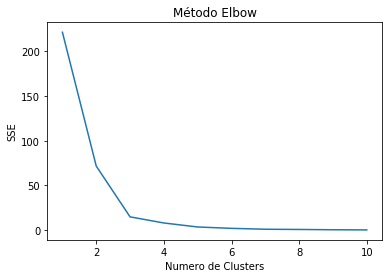

In [67]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss, scaley=True)
plt.title('Método Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('SSE')
plt.show()

In [68]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [70]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
kmeans.cluster_centers_

array([[0.        , 0.        ],
       [4.13      , 0.        ],
       [8.35714286, 0.        ]])

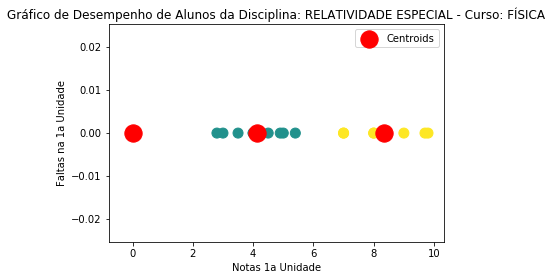

In [72]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Gráfico de Desempenho de Alunos da Disciplina: ' + nome_disciplina_turma2 + ' - Curso: ' + curso_turma2)
plt.xlabel('Notas 1a Unidade')
plt.ylabel('Faltas na 1a Unidade')
plt.legend()

plt.show()